In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Import

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
print("Imported successfully")

Imported successfully


# Input data

In [3]:
df_train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv", index_col = 0)
df_train.head()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv", index_col = 0)
df_test.head()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Explore data

In [5]:
print(df_train.shape)
df_train.describe()

(8693, 13)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
desc_train = pd.DataFrame({"Num_NaN_Val": df_train.isnull().sum(), "%_NaN_Val": df_train.isnull().sum()/df_train.shape[0]*100})
print(desc_train)

              Num_NaN_Val  %_NaN_Val
HomePlanet            201   2.312205
CryoSleep             217   2.496261
Cabin                 199   2.289198
Destination           182   2.093639
Age                   179   2.059128
VIP                   203   2.335212
RoomService           181   2.082135
FoodCourt             183   2.105142
ShoppingMall          208   2.392730
Spa                   183   2.105142
VRDeck                188   2.162660
Name                  200   2.300702
Transported             0   0.000000


In [7]:
print(df_test.shape)
df_test.describe()

(4277, 12)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [8]:
desc_test = pd.DataFrame({"Num_NaN_Val": df_test.isnull().sum(), "%_NaN_Val": df_test.isnull().sum()/df_test.shape[0]*100})
print(desc_test)

              Num_NaN_Val  %_NaN_Val
HomePlanet             87   2.034136
CryoSleep              93   2.174421
Cabin                 100   2.338087
Destination            92   2.151040
Age                    91   2.127660
VIP                    93   2.174421
RoomService            82   1.917232
FoodCourt             106   2.478373
ShoppingMall           98   2.291326
Spa                   101   2.361468
VRDeck                 80   1.870470
Name                   94   2.197802


In [9]:
df_train.groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


# Data engeniring

In [11]:
# Удаление строк с NaN
def droped_NaN_row(df): 
    replaced_df = df.copy(deep = True)
    old_num_row = replaced_df.shape[0]
    replaced_df.dropna(inplace=True)
    dif = old_num_row - replaced_df.shape[0]
    print("Droped: %.2f (%.2f)" % (dif, dif/old_num_row*100))
    return replaced_df

In [12]:
# Замена численных значений средними по колонке
def replace_train(df):
    replaced_df = df.copy(deep = True)

    for col in replaced_df.describe().columns:
        median = replaced_df[col].median()
        replaced_df[col].fillna(median, inplace=True)
        
    return replaced_df

In [13]:
bool_feature_names = ['CryoSleep', 'VIP', 'Transported']

In [14]:
df_train[df_train.isnull().any(1)]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True


**Очевидно,что если человек находится в крисне во время полета, то он не оплачивает никаких дополнительных услуг! И наоборот, если человек оплатил доп услуги, то он не находится в криосне!**

In [15]:
df_train.loc[(df_train.CryoSleep == True), ('RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck')] = 0.0
df_train.loc[(df_train.CryoSleep == True), ('VIP')] = False

In [16]:
df_train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [17]:
df_train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.069110,0.129694,0.033169,0.123685,0.100926,-0.075026
RoomService,0.069110,1.000000,-0.014295,0.056238,0.011483,-0.018171,-0.244925
FoodCourt,0.129694,-0.014295,1.000000,-0.012615,0.222834,0.228902,0.044595
ShoppingMall,0.033169,0.056238,-0.012615,1.000000,0.015357,-0.005958,0.007966
Spa,0.123685,0.011483,0.222834,0.015357,1.000000,0.154754,-0.221592
VRDeck,0.100926,-0.018171,0.228902,-0.005958,0.154754,1.000000,-0.207630
Transported,-0.075026,-0.244925,0.044595,0.007966,-0.221592,-0.207630,1.000000


In [18]:
df_train.groupby('HomePlanet').Transported.count()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: Transported, dtype: int64

In [19]:
# Добавление булевых столбцов с планетой-домом
df_train['HomeEuropa'] = df_train['HomePlanet'] == 'Europa'
df_train['HomeEarth'] = df_train['HomePlanet'] == 'Earth'
df_train['HomeMars'] = df_train['HomePlanet'] == 'Mars'

In [20]:
df_train.groupby('Destination').Transported.count()

Destination
55 Cancri e      1800
PSO J318.5-22     796
TRAPPIST-1e      5915
Name: Transported, dtype: int64

In [21]:
# Добавление булевых столбцов с планетой прилета
df_train['TRAPPIST-1e'] = df_train['Destination'] == 'TRAPPIST-1e'
df_train['55 Cancri e'] = df_train['Destination'] == '55 Cancri e'
df_train['PSO J318.5-22'] = df_train['Destination'] == 'PSO J318.5-22'

In [22]:
# Разделение столбцов с кабиной
df_train[['deck', 'num', 'side']] = df_train['Cabin'].str.split('/',expand=True)

In [23]:
df_train['index'] = df_train.index
#df_train.index.str.split('_',expand=True)
df_train[['group', 'number']] = df_train['index'].str.split('_',expand=True)
df_train.drop(['index'], axis=1, inplace=True)

In [24]:
for col in ['CryoSleep', 'HomeEuropa', 'VIP', 'Transported', 'HomeEarth', 'HomeMars', 
            'TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', 
            'num', 'group', 'number']:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce').astype('Int64')

In [25]:
df_train.drop(['HomePlanet', 'Cabin', 'Destination', 'Name', 'deck', 'side'], axis=1, inplace=True)

In [26]:
df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomeEuropa,HomeEarth,HomeMars,TRAPPIST-1e,55 Cancri e,PSO J318.5-22,num,group,number
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,1,1
0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,1,0,1,0,0,0,2,1
0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1,0,0,0,3,1
0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1,0,0,0,3,2
0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,1,0,1,0,0,1,4,1


In [27]:
# print(pd.concat([df_train.groupby('deck').Transported.sum(),
#                 df_train.groupby('deck').Transported.count()], axis=1))
#                 #.plot(kind='hist')

<AxesSubplot:ylabel='Density'>

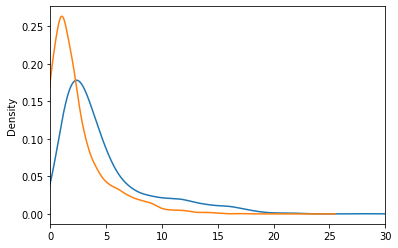

In [28]:
df_train.groupby('num').Transported.count().plot(kind='kde', xlim=[0, 30])
df_train.groupby('num').Transported.sum().plot(kind='kde', xlim=[0, 30])

In [29]:
# print(pd.concat([df_train.groupby('side').Transported.sum(),
#                 df_train.groupby('side').Transported.count()], axis=1))

# Model

In [30]:
df_train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'HomeEuropa', 'HomeEarth', 'HomeMars',
       'TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', 'num', 'group',
       'number'],
      dtype='object')

In [31]:
#df_train = replace_train(df_train)
df_train = droped_NaN_row(df_train)

Droped: 1214.00 (13.97)


In [32]:
y = df_train.Transported

feature_names = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomeEuropa', 'HomeEarth', 'HomeMars',
       'TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']
x = df_train[feature_names]

In [33]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 1)

In [34]:
# Деревья решений
DTR_model = DecisionTreeRegressor(random_state=1)

DTR_model.fit(train_x, train_y)

DTR_pred = DTR_model.predict(val_x)


DTR_pred[DTR_pred < 0.5] = 0
DTR_pred[DTR_pred >= 0.5] = 1

print(mean_absolute_error(np.asarray(val_y), DTR_pred))

0.24064171122994651


In [35]:
# Рандомный деревья решений
from sklearn.ensemble import RandomForestRegressor

RFR_model = RandomForestRegressor(random_state=1)

RFR_model.fit(train_x, train_y)

RFR_pred = RFR_model.predict(val_x)

RFR_pred[RFR_pred < 0.5] = 0
RFR_pred[RFR_pred >= 0.5] = 1

print(mean_absolute_error(np.asarray(val_y), RFR_pred))

0.2016042780748663


In [36]:
# Метод K ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(train_x)
# train_x_new = scaler.transform(train_x)
# val_x_new = scaler.transform(val_x)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_x, train_y.astype(int))

KNN_pred = classifier.predict(val_x)

KNN_pred[KNN_pred < 0.5] = 0
KNN_pred[KNN_pred >= 0.5] = 1

print(mean_absolute_error(np.asarray(val_y), KNN_pred))

0.21122994652406418


In [37]:
# Гауссов наивный Байес
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(train_x, train_y.astype(int))

GNB_pred = GNB_model.predict(val_x)

GNB_pred[GNB_pred < 0.5] = 0
GNB_pred[GNB_pred >= 0.5] = 1

print(mean_absolute_error(np.asarray(val_y), GNB_pred))

0.2716577540106952


In [38]:
# Метод опорных векторов
# from sklearn.svm import SVC

# SVC_model = SVC(kernel='linear')
# SVC_model.fit(train_x, train_y.astype(int))

# SVC_pred = SVC_model.predict(val_x)

# print(mean_absolute_error(np.asarray(val_y), SVC_pred))

In [39]:
all_pred = (KNN_pred + RFR_pred + DTR_pred)/3

all_pred[all_pred < 0.5] = 0
all_pred[all_pred >= 0.5] = 1

print(mean_absolute_error(np.asarray(val_y), all_pred))

0.2016042780748663
